##  Week2 복습과제
### 1. Wine 성분 데이터를 바탕으로 와인 품질 분류
### 결정트리, 랜덤포레스트 실습
#### 데이터셋을 다운 받아주세요!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1.1 'train.csv'를 불러와 train_df에, 'test.csv'를 불러와 test_df에 저장하시오

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/test.csv')

#### 1.2 train 데이터의 3 행을 통해 데이터를 파악하시오

In [ ]:
train_df.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


#### 1.3 index 열이 불필요해보입니다. drop을 통해 train과 test 데이터의 index행을 삭제하세요 그리고 확인해주세요

In [ ]:
train_df.drop('index',axis = 1,inplace = True)
train_df.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test_df.drop('index',axis = 1,inplace = True)
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


#### 1.4 train 데이터의 결측치의 유무 여부 또는 평균, min, max, q1, q2, q3, q4 등을 describe 또는 info를 활용해 확인하시오

In [ ]:
train_df.info()
# 총 데이터 건수와 칼럼별 데이터 타입, Null 건수 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [ ]:
train_df.describe()
# 숫자형 컬럼에 대한 개략적인 데이터 분포도 확인

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#### 1.5 'quality'열에 어떤 값이 들어있는 지 알아보시오 (예측하고자 하는 y값이 될 열 입니다.) value_counts 사용

In [ ]:
train_df['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

#### 1.6 train 데이터와 test 데이터의 'type'이 object로 되어있으니 인코딩을 해주세요 (레이블인코딩, encoder.fit_transform 사용)
#### 잘 인코딩이 되었는지 확인해주세요(value_counts() 사용)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder() # 라벨 인코더 객체 생성
encoder.fit(train_df['type'])
train_df['type'] = encoder.transform(train_df['type']) # label-encoding을 시킨 결과를 다시 df의 컬럼에 저장
train_df['type'].value_counts()
# red, white -> 0,1로 encoding

1    4159
0    1338
Name: type, dtype: int64

In [ ]:
encoder.fit(test_df['type'])
test_df['type'] = encoder.transform(test_df['type']) # label-encoding을 시킨 결과를 다시 df의 컬럼에 저장
test_df['type'].value_counts()
# red, white -> 0,1로 encoding

1    739
0    261
Name: type, dtype: int64

#### 1.7 독립변수(X)와 종속변수(y)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:,1:],train_df.iloc[:,0],test_size = 0.2,random_state = 12)

In [ ]:
X_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1191,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,1
1242,7.1,0.26,0.32,16.2,0.044,31.0,170.0,0.99644,3.17,0.37,11.2,1
1382,6.0,0.45,0.65,9.7,0.080,11.0,159.0,0.99560,3.04,0.48,9.4,1


In [ ]:
y_train.head(3)

1191    6
1242    5
1382    5
Name: quality, dtype: int64

In [ ]:
X_test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
3263,7.0,0.320,0.24,6.2,0.048,31.0,228.0,0.99570,3.23,0.62,9.40,1
3818,11.9,0.390,0.69,2.8,0.095,17.0,35.0,0.99940,3.10,0.61,10.80,0
5132,5.8,0.315,0.19,19.4,0.031,28.0,106.0,0.99704,2.97,0.40,10.55,1


In [ ]:
y_test.head(3)

3263    6
3818    6
5132    6
Name: quality, dtype: int64

#### 1.8 DecisionTreeClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오. 
#### DecisionTreeClassifer 의 random_state = 12

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 12)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

# 예측 & 정확도 평가
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.6082


#### 1.9 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으시오

params = {
    'max_depth' : [11, 14, 17, 20, 23, 26, 29],
    'min_samples_split' : [2]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { 'max_depth' : [11, 14, 17, 20, 23, 26, 29],
          'min_samples_split' : [2] }

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.5727
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 17, 'min_samples_split': 2}


#### 1.10 테스트 데이터 세트에 대해 예측을 수행해주세요

In [ ]:
best_df_clf = grid_cv.best_estimator_ # 최적의 파라미터로 결정 트리 모델 객체 생성
pred1 = best_df_clf.predict(X_test) # 예측
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.5973


### 2. 앙상블, 랜덤 포레스트

#### 2.1 개별 모델로 로지스틱 회귀와 KNN을 사용하여 개별 모델의 학습 / 예측/ 평가를 진행해보세요. (solver="liblinear", n_neighbors = 16)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
### 데이터 loading
cancer = load_breast_cancer() # 데이터 준비

# 데이터 형태 확인
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
### 개별 모델 생성
lr_clf = LogisticRegression(solver="liblinear") # 로지스틱 회귀
knn_clf = KNeighborsClassifier(n_neighbors = 16) # KNN 모델

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2 , random_state = 156)

### 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers: # 각 분류기별로 수행해라~
    classifier.fit(X_train , y_train) # 학습
    pred = classifier.predict(X_test) # 예측
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred))) # 평가

LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9561


#### 2.2 로지스틱 회귀와 KNN을 기반으로 하여 보팅 분류기를 만들어 본 후, 학습/예측/평가를 진행해보세요. (VotingClassifier 사용, voting='soft')

In [ ]:
### Voting 분류기 생성
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)], voting = 'soft')

### 학습/ 예측/ 평가
vo_clf.fit(X_train, y_train) # 학습
pred = vo_clf.predict(X_test) # 예측
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred))) # 평가

Voting 분류기 정확도: 0.9561


#### 2.3 randomforestclassifier를 이용하여 훈련 데이터를 fit한 후, 테스트셋의 정확도를 구하세요(random_state=12, max_depth=8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
rf_clf = RandomForestClassifier(random_state = 12, max_depth = 8)
rf_clf.fit(X_train, y_train) # 학습
pred = rf_clf.predict(X_test) # 예측
accuracy = accuracy_score(y_test, pred) # 평가
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9474


#### 2.4 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.(random_state=12, n_jobs= -1, cv=2)

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [2, 8, 14, 20, 26, 32], 
    'min_samples_leaf' : [8, 12, 16, 20], 
    'min_samples_split' : [8, 16, 24, 32]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { 'n_estimators':[10, 50, 100], 
          'max_depth' : [2, 8, 14, 20, 26, 32], 
          'min_samples_leaf' : [8, 12, 16, 20], 
          'min_samples_split' : [8, 16, 24, 32]}

In [ ]:
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 12, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1 )
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}
최고 예측 정확도: 0.9517


#### 2.5 2.4번에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 성능을 측정해보세요.

In [ ]:
rf_best_clf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 8, \
                                 min_samples_split = 8, n_estimators = 50,random_state = 12)
rf_best_clf.fit(X_train, y_train)
pred = rf_best_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9386


#### 2.6 피처 주요도를 막대그래프로 시각화해보세요.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

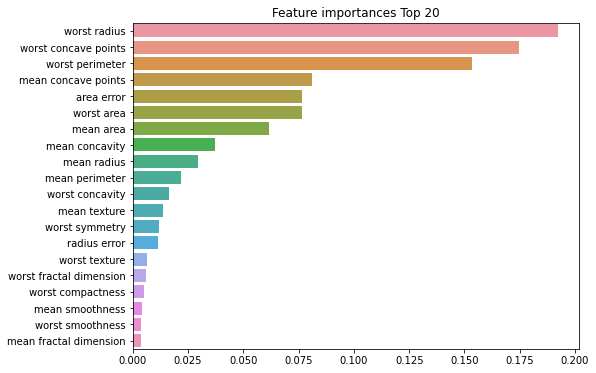

In [ ]:
ftr_importances_values = rf_best_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, Seaborn의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)

# 중요도 값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

### 3. SVM 사용

#### 3.1 split된 와인 분류 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요. (C = 5)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:,1:],train_df.iloc[:,0],test_size = 0.2,random_state = 12)

In [ ]:
lin_svm = SVC(kernel = 'linear',C = 5) # 모댈 객체 생성
lin_svm.fit(X_train,y_train) # 학습
pred = lin_svm.predict(X_test) # 예측
accuracy = accuracy_score(y_test,pred) # 평가
print('예측 정확도: {0:.4f}'.format(accuracy))

예측 정확도: 0.5482


#### 3.2 와인 품질 분류 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [ ]:
lin_svm = SVC(kernel = 'linear')

In [ ]:
grid_cv = GridSearchCV(lin_svm, param_grid = param)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'C': 40}
최고 예측 정확도: 0.5110


#### 3.3 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.(best_estimator_ 이용)

In [ ]:
best_lin_svm = grid_cv.best_estimator_
pred = best_lin_svm.predict(X_test)
accuracy = accuracy_score(y_test,pred) 
print('예측 정확도: {0:.4f}'.format(accuracy))

예측 정확도: 0.5182


#### 3.4 GridSearchCV를 이용하여 최적의 gamma, C 값을 찾고 가우시안 SVM 모델을 만들어 fit 하세요.

In [ ]:
params={'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [ ]:
grid_cv = GridSearchCV(SVC(kernel = 'rbf'),params)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)

최적 하이퍼 파라미터:
 {'C': 1, 'gamma': 0.25}


In [ ]:
best_gs_svm = grid_cv.best_estimator_
best_gs_svm.fit(X_train,y_train) # 학습
pred = best_gs_svm.predict(X_test) # 예측
accuracy = accuracy_score(y_test,pred) # 평가
print('예측 정확도: {0:.4f}'.format(accuracy))

예측 정확도: 0.5636
